In [65]:
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as py
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [66]:
ethereum_path = r'C:\Users\Katerina\Desktop\Big data project\ETH-USD.csv'


In [67]:
df = pd.read_csv(ethereum_path)
df=df.set_index(pd.DatetimeIndex(df['Date'].values))

In [68]:
print(df.head())

                  Date         Open         High          Low        Close  \
2022-12-03  2022-12-03  1294.456543  1299.840332  1241.431885  1243.334839   
2022-12-04  2022-12-04  1243.219238  1281.492310  1242.911743  1280.256592   
2022-12-05  2022-12-05  1279.998901  1302.237549  1252.472412  1259.676758   
2022-12-06  2022-12-06  1259.854248  1271.923218  1247.629883  1271.653809   
2022-12-07  2022-12-07  1271.553101  1272.694092  1224.447998  1232.437500   

              Adj Close      Volume  
2022-12-03  1243.334839  5672609405  
2022-12-04  1280.256592  5174128454  
2022-12-05  1259.676758  6120359523  
2022-12-06  1271.653809  5089212680  
2022-12-07  1232.437500  5752205180  


In [69]:

df['Average_Price'] = (df['Open'] + df['High'] + df['Low'] + df['Close']) / 4 * df['Volume']
df['Average_Price'] = df['Average_Price'] / df['Volume'].sum()


In [70]:
df['Average_Price']

2022-12-03    2.765372
2022-12-04    2.506878
2022-12-05    2.992649
2022-12-06    2.467290
2022-12-07    2.761148
                ...   
2023-11-29    7.016103
2023-11-30    6.349168
2023-12-01    8.651962
2023-12-02    7.469412
2023-12-03    8.468914
Name: Average_Price, Length: 366, dtype: float64

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2022-12-03 to 2023-12-03
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           366 non-null    object 
 1   Open           366 non-null    float64
 2   High           366 non-null    float64
 3   Low            366 non-null    float64
 4   Close          366 non-null    float64
 5   Adj Close      366 non-null    float64
 6   Volume         366 non-null    int64  
 7   Average_Price  366 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 25.7+ KB


In [72]:
df['Date'] = pd.to_datetime(df['Date'])

In [73]:
df.set_index('Date', inplace=True)
ethereum_trace=go.Scatter(x=df.index, y= df['Average_Price'], name='Price')
py.iplot([ethereum_trace])

In [74]:
data_per_month = df['Average_Price'].resample('M').mean()

# Now create your plot with the resampled data
ethereum_trace = go.Scatter(x=data_per_month.index, y=data_per_month, name='Monthly Average Price')

# Plot the data
py.iplot([ethereum_trace])

In [75]:
data_per_week = df['Average_Price'].resample('W').mean()

# Now create your plot with the resampled data
ethereum_trace = go.Scatter(x=data_per_week.index, y=data_per_week, name='Weekly Average Price')

# Plot the data
py.iplot([ethereum_trace])

In [76]:
future_days = 5

In [77]:
df[str(future_days) + 'Day_Price_Forecast'] = df[['Close']].shift(-future_days)
df[['Close',str(future_days) + 'Day_Price_Forecast']]

,Close,5Day_Price_Forecast
Date,,
2022-12-03,1243.334839,1281.116333
2022-12-04,1280.256592,1264.284790
2022-12-05,1259.676758,1266.384155
2022-12-06,1271.653809,1263.868530
2022-12-07,1232.437500,1274.619019
...,...,...
2023-11-29,2029.929199,NaN
2023-11-30,2052.556152,NaN
2023-12-01,2087.139893,NaN


In [78]:
X = np.array(df[['Close']])
X = X[:df.shape[0]- future_days]
print(X)

[[1243.334839]
 [1280.256592]
 [1259.676758]
 [1271.653809]
 [1232.4375  ]
 [1281.116333]
 [1264.28479 ]
 [1266.384155]
 [1263.86853 ]
 [1274.619019]
 [1320.549194]
 [1309.328735]
 [1266.353882]
 [1168.259399]
 [1188.149536]
 [1184.71521 ]
 [1167.609863]
 [1217.703613]
 [1213.599976]
 [1218.182129]
 [1220.159424]
 [1221.14856 ]
 [1218.962036]
 [1226.974365]
 [1212.791626]
 [1189.986084]
 [1201.595337]
 [1199.232788]
 [1196.77124 ]
 [1200.964844]
 [1214.656616]
 [1214.778809]
 [1256.526611]
 [1250.438599]
 [1269.379028]
 [1264.270386]
 [1287.359497]
 [1321.53894 ]
 [1336.58606 ]
 [1387.932739]
 [1417.938477]
 [1451.614868]
 [1550.706909]
 [1552.479492]
 [1576.833496]
 [1567.846069]
 [1515.506958]
 [1552.556519]
 [1659.75415 ]
 [1627.118164]
 [1628.38208 ]
 [1628.251099]
 [1556.604248]
 [1611.71106 ]
 [1603.105957]
 [1598.156494]
 [1572.435059]
 [1646.15564 ]
 [1567.326538]
 [1586.5354  ]
 [1641.792725]
 [1643.241577]
 [1664.745605]
 [1667.059204]
 [1631.645874]
 [1616.24707 ]
 [1672.003

In [79]:
y= np.array(df[str(future_days) + 'Day_Price_Forecast'])
y= y[:-future_days]
print(y)

[1281.116333 1264.28479  1266.384155 1263.86853  1274.619019 1320.549194
 1309.328735 1266.353882 1168.259399 1188.149536 1184.71521  1167.609863
 1217.703613 1213.599976 1218.182129 1220.159424 1221.14856  1218.962036
 1226.974365 1212.791626 1189.986084 1201.595337 1199.232788 1196.77124
 1200.964844 1214.656616 1214.778809 1256.526611 1250.438599 1269.379028
 1264.270386 1287.359497 1321.53894  1336.58606  1387.932739 1417.938477
 1451.614868 1550.706909 1552.479492 1576.833496 1567.846069 1515.506958
 1552.556519 1659.75415  1627.118164 1628.38208  1628.251099 1556.604248
 1611.71106  1603.105957 1598.156494 1572.435059 1646.15564  1567.326538
 1586.5354   1641.792725 1643.241577 1664.745605 1667.059204 1631.645874
 1616.24707  1672.00354  1650.716797 1546.438232 1514.869141 1539.926758
 1515.033691 1507.165894 1556.875122 1673.745972 1640.067627 1694.783325
 1691.819458 1681.436157 1702.675171 1658.036377 1643.231689 1651.073853
 1608.373169 1594.914917 1640.817139 1634.326416 160

In [80]:
#Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [82]:
svr_rbf = SVR(kernel = 'rbf', C=1e3, gamma = 0.00001)
svr_rbf.fit(x_train,y_train)

SVR(C=1000.0, gamma=1e-05)

In [106]:
svr_rbf_confidence =svr_rbf.score(x_test,y_test)
print('svr_rbf accuracy:',svr_rbf_confidence)

svr_rbf accuracy: 0.865340772377353


In [85]:
svm_prediction = svr_rbf.predict(x_test)
print(svm_prediction)

[1652.29536387 1962.62659576 1409.66026496 1618.58881955 1712.82542894
 1645.93598188 1614.5029693  1947.88580643 1969.80244468 1922.06815661
 1896.17748331 1931.47492593 1294.7634398  1854.36352764 1385.66232414
 1633.9370172  1587.80963942 1921.006154   1837.89141687 1826.17682897
 1219.09964013 1657.66502362 1597.20645055 1893.86483697 1616.00296639
 1906.18707402 1820.80820229 1971.34457055 1885.57728323 1861.37898336
 1613.84725319 1641.46016291 1617.60999714 1865.45853214 1683.64765774
 1633.64588864 1733.98752706 1895.72653691 1846.46810458 1236.47899649
 1880.74112171 1239.28298921 1305.86654813 1965.71507449 1684.57941075
 1623.984657   1624.47060039 1918.31894259 1900.8597481  1289.72886065
 1721.16725182 1620.13592125 1636.61721418 1615.02051648 1906.10993604
 1649.57941374 1439.01418962 1868.50447173 1808.73427091 1772.02394345
 1880.70408637 1954.76059505 1887.25776358 1618.52353785 1617.11206206
 1664.98562787 1919.15775702 1832.47551246 1631.26360812 1698.44962923
 1704.

In [86]:
print(y_test)

[1611.47644  1960.881592 1550.706909 1567.326538 1872.942993 1780.045288
 1792.485107 1897.599243 2060.408447 1889.007935 1892.412476 2064.425293
 1266.384155 1908.916992 1167.609863 1645.63916  1703.50708  2063.286133
 1684.852051 1894.157715 1214.656616 1806.760742 1515.506958 1937.438354
 1629.304443 1877.704102 1752.384766 2052.556152 1923.681885 1866.564209
 1646.15564  1628.491211 1637.347046 1910.914185 1594.914917 1566.254761
 1792.737183 1846.30188  1850.753418 1287.359497 1856.162354 1218.962036
 1266.353882 2087.139893 1785.576538 1603.105957 1572.435059 1890.969116
 1796.490601 1321.53894  1645.831543 1641.640381 1737.659424 1691.819458
 1870.789307 1647.838135 1552.479492 1861.643799 1854.380615 1795.70813
 1911.646118 2165.704102 1931.466553 1567.713013 1564.46875  1633.892578
 1910.588013 1909.114014 1616.24707  1813.860596 1892.862061 1839.280151
 1214.778809]


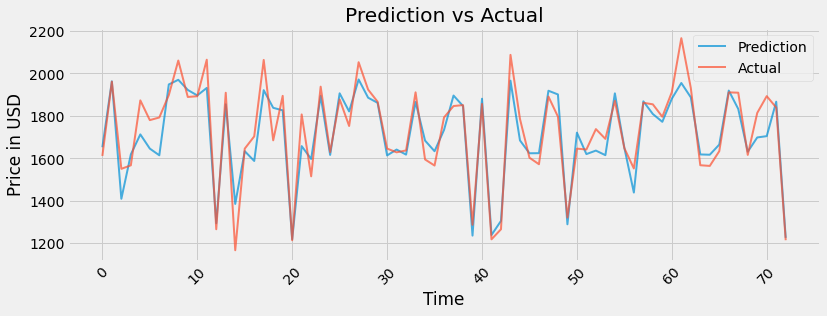

In [87]:
plt.figure(figsize=(12,4))
plt.plot(svm_prediction,label='Prediction',lw=2,alpha=.7)
plt.plot(y_test,label='Actual',lw=2,alpha=.7)
plt.title('Prediction vs Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [92]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot

# Convert datetime to a string representation for hover text
hover_text = [str(date) for date in x_test]

# Plotting the predicted values
trace_predicted = go.Scatter(x=hover_text, y=svm_prediction, mode='lines', name='Predicted', line=dict(color='blue'))

# Plotting the actual values
trace_actual = go.Scatter(x=hover_text, y=y_test, mode='lines', name='Actual', line=dict(color='red'))

# Creating the subplot
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, subplot_titles=["Price Prediction vs Actual"])

# Adding traces to the subplot
fig.add_trace(trace_predicted, row=1, col=1)
fig.add_trace(trace_actual, row=1, col=1)

# Adding hover information with datetime
fig.update_traces(hovertemplate='%{text}', text=hover_text)

# Updating layout
fig.update_layout(title_text="Price Prediction vs Actual", xaxis_title="Date", yaxis_title="Price")

# Display the plot
iplot(fig)


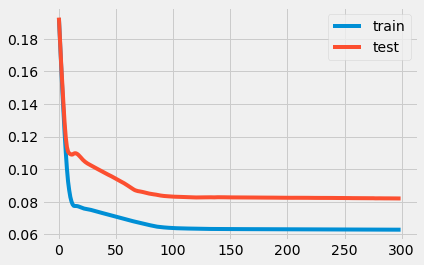

In [93]:
# Extracting loss values
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting
plt.plot(loss, label='train')
plt.plot(val_loss, label='test')
plt.legend()
plt.show()

In [100]:
pip install tabulate


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
import numpy as np
from tabulate import tabulate

# Calculate daily returns based on SVR predictions
daily_returns = np.diff(svm_prediction)

# Initialize positions array (1: buy, -1: sell, 0: hold)
positions = np.zeros_like(daily_returns)

# Set buy condition (predicted price for the next day is higher)
positions[daily_returns > 0] = 1

# Set sell condition (predicted price for the next day is lower)
positions[daily_returns < 0] = -1

# Create a table with dates (using index), prices, positions, and buy/sell column
table_data = zip(df.index[1:], df['Close'][1:], positions, np.where(positions == 1, 'Buy', np.where(positions == -1, 'Sell', 'Hold')))
table_headers = ["Date", "Price", "Position", "Buy/Sell"]

# Print the table
print("Day-by-day strategy:")
print(tabulate(table_data, headers=table_headers, tablefmt="pretty"))


Day-by-day strategy:
+---------------------+-------------+----------+----------+
|        Date         |    Price    | Position | Buy/Sell |
+---------------------+-------------+----------+----------+
| 2022-12-04 00:00:00 | 1280.256592 |   1.0    |   Buy    |
| 2022-12-05 00:00:00 | 1259.676758 |   -1.0   |   Sell   |
| 2022-12-06 00:00:00 | 1271.653809 |   1.0    |   Buy    |
| 2022-12-07 00:00:00 |  1232.4375  |   1.0    |   Buy    |
| 2022-12-08 00:00:00 | 1281.116333 |   -1.0   |   Sell   |
| 2022-12-09 00:00:00 | 1264.28479  |   -1.0   |   Sell   |
| 2022-12-10 00:00:00 | 1266.384155 |   1.0    |   Buy    |
| 2022-12-11 00:00:00 | 1263.86853  |   1.0    |   Buy    |
| 2022-12-12 00:00:00 | 1274.619019 |   -1.0   |   Sell   |
| 2022-12-13 00:00:00 | 1320.549194 |   -1.0   |   Sell   |
| 2022-12-14 00:00:00 | 1309.328735 |   1.0    |   Buy    |
| 2022-12-15 00:00:00 | 1266.353882 |   -1.0   |   Sell   |
| 2022-12-16 00:00:00 | 1168.259399 |   1.0    |   Buy    |
| 2022-12-17 00:00: